## Problem Statement - Classify the incoming data whether kyphosis will occur or not

https://stat.ethz.ch/R-manual/R-patched/library/rpart/html/kyphosis.html

Description

The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery

Usage

kyphosis
Format

This data frame contains the following columns:

Kyphosis
a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

Age
in months

Number
the number of vertebrae involved

Start
the number of the first (topmost) vertebra operated on.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


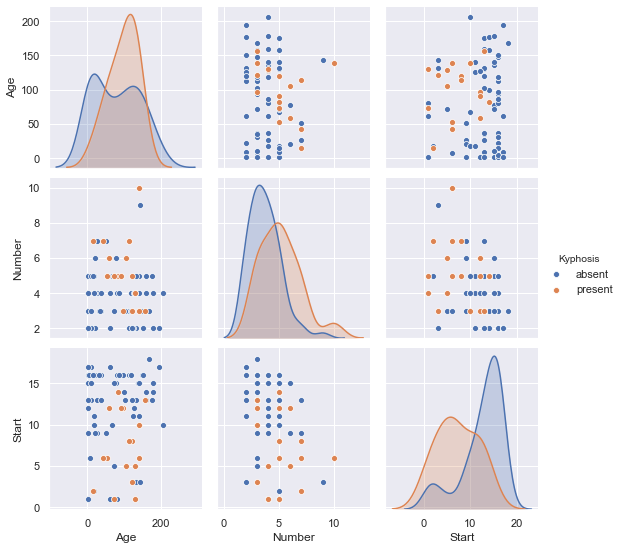

In [7]:
sns.pairplot(df,hue='Kyphosis')

### Train Test Split

In [9]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## Training using a Decision tree classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtree = DecisionTreeClassifier()

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Prediction and Evaluation

In [36]:
y_pred = dtree.predict(X_test)

In [37]:
y_pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [38]:
y_test.shape

(25,)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
print(f'Confusion Matrix : \n {confusion_matrix(y_test,y_pred)}')

Confusion Matrix : 
 [[17  2]
 [ 5  1]]


In [41]:
print(f'Accuracy Score : \n {accuracy_score(y_test,y_pred)}')

Accuracy Score : 
 0.72


In [19]:
print(f'Classification Report : \n {classification_report(y_test,y_pred)}')

Classification Report : 
               precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [43]:
y_pred_train = dtree.predict(X_train)

print(f'Accuracy Score : \n {accuracy_score(y_train,y_pred_train)}')

Accuracy Score : 
 1.0


## Visualization of Decision tree

In [45]:
!pip install pydot

In [44]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])

features

['Age', 'Number', 'Start']

In [49]:
len(X_train)

56

In [50]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


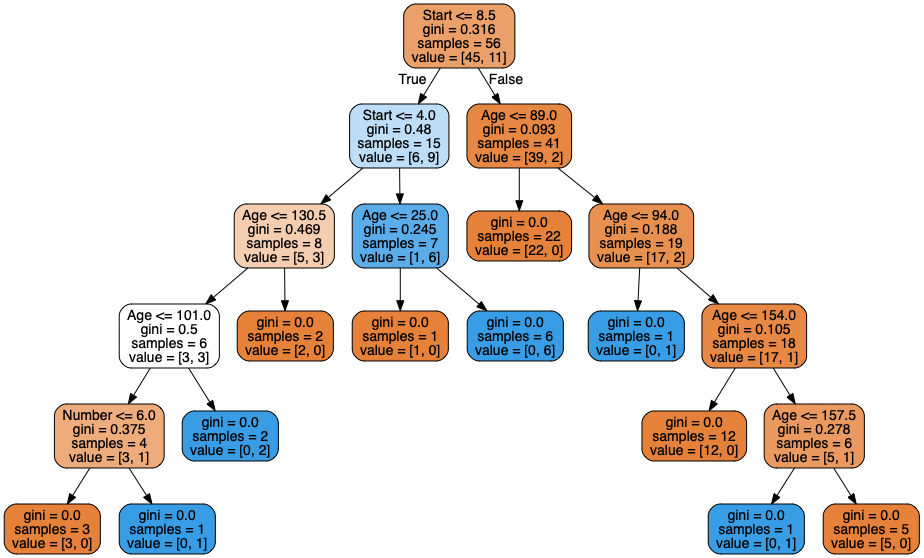

In [46]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph[0].create_png())

* Gini


* Information Gain


* Entropy

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
rfc_pred_train = rfc.predict(X_train)

In [78]:
print(f'Accuracy Score : \n {accuracy_score(y_train,rfc_pred_train)}')

Accuracy Score : 
 0.8571428571428571


In [79]:
rfc_pred = rfc.predict(X_test)

In [80]:
print(f'Accuracy Score : \n {accuracy_score(y_test,rfc_pred)}')

Accuracy Score : 
 0.8


In [82]:
print(f'Confusion Matrix : \n {confusion_matrix(y_test,rfc_pred)}')

Confusion Matrix : 
 [[19  0]
 [ 5  1]]


## Grid Search Cross Validation

# Great Job !